<a href="https://colab.research.google.com/github/neeshanth/EDA-TH-DA-1/blob/main/mod5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

file_path = "/content/HepatitisCdata.csv"
data = pd.read_csv(file_path)

# Cleaning the data by dropping rows with missing values
data_clean = data.dropna()

# numerical columns for clustering
numerical_columns = data_clean.select_dtypes(include=['float64', 'int64']).columns

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_clean[numerical_columns])

# Spectral Clustering

<ipython-input-5-39de757ee8e9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Cluster'] = spectral.fit_predict(scaled_data)



Cluster Labels:
Cluster
0    587
2      1
1      1
Name: count, dtype: int64


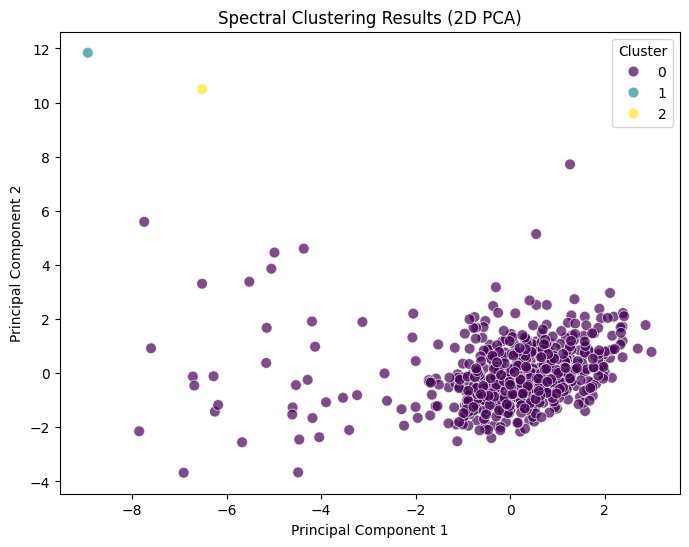


Silhouette Score: 0.7631595803239721


In [5]:
# Hyperparameter involved: n_clusters
spectral = SpectralClustering(n_clusters=3, affinity='rbf', random_state=42)
data_clean['Cluster'] = spectral.fit_predict(scaled_data)

# Adding the cluster labels to the dataframe
print("\nCluster Labels:")
print(data_clean['Cluster'].value_counts())

# Visualizing the clusters (2D PCA visualization)
from sklearn.decomposition import PCA

# Reduce to 2D
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=data_clean['Cluster'], palette="viridis", s=60, alpha=0.7)
plt.title("Spectral Clustering Results (2D PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

silhouette_avg = silhouette_score(scaled_data, data_clean['Cluster'])
print(f"\nSilhouette Score: {silhouette_avg}")

# Expectation-Maximization (EM) Algorithm

<ipython-input-8-d5bdb667d40f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Cluster'] = gmm.fit_predict(scaled_data)



Cluster Labels:
Cluster
2    275
0    267
1     47
Name: count, dtype: int64


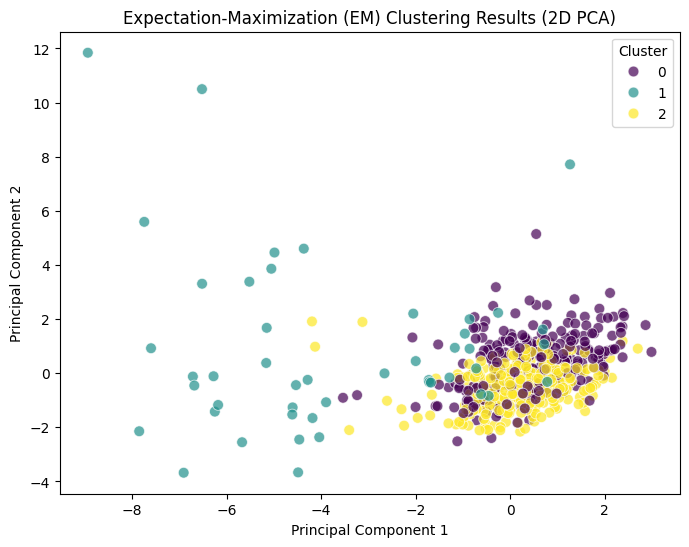


BIC (Bayesian Information Criterion): 14715.641111592113
AIC (Akaike Information Criterion): 13524.709189638881


In [8]:
from sklearn.mixture import GaussianMixture
# Fit the Gaussian Mixture Model (EM algorithm)
n_components = 3  # Number of clusters, adjust as needed
gmm = GaussianMixture(n_components=n_components, random_state=42)
data_clean['Cluster'] = gmm.fit_predict(scaled_data)

# Add the cluster labels to the dataframe
print("\nCluster Labels:")
print(data_clean['Cluster'].value_counts())

# Visualize the clusters (2D PCA visualization)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Plot the results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=data_clean['Cluster'], palette="viridis", s=60, alpha=0.7)
plt.title("Expectation-Maximization (EM) Clustering Results (2D PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Optional: Evaluate the model using BIC and AIC
print(f"\nBIC (Bayesian Information Criterion): {gmm.bic(scaled_data)}")
print(f"AIC (Akaike Information Criterion): {gmm.aic(scaled_data)}")


# Hierarchical Agglomerative model-based clustering

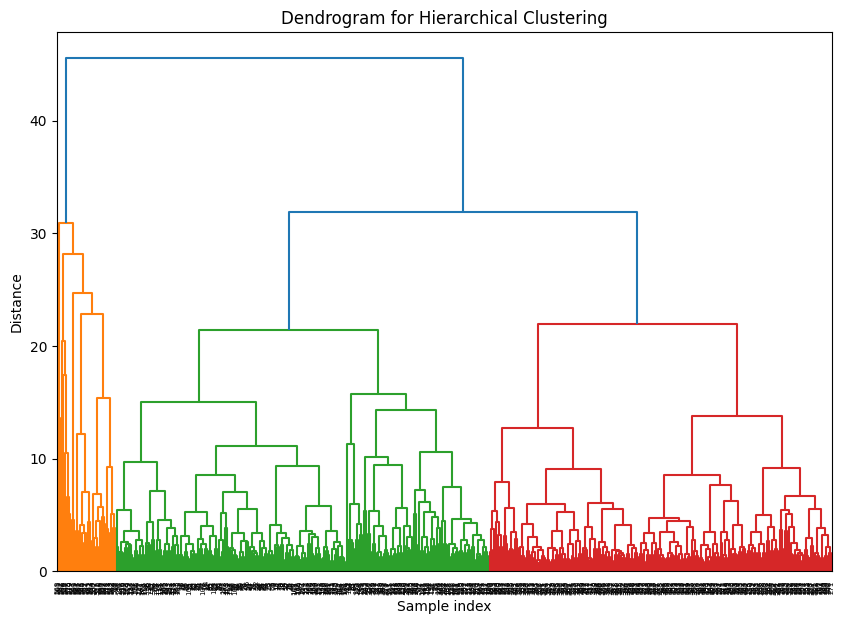

<ipython-input-15-1702c174bb13>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Cluster'] = clusters



Outliers Detected:
     Unnamed: 0       Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  \
248         249  0=Blood Donor   55   m  28.1  65.5  16.6  17.5   2.8   5.58   
265         266  0=Blood Donor   58   m  41.3  58.9  12.8  23.4   5.4   8.17   
273         274  0=Blood Donor   59   m  43.8  46.6  28.3  27.4   6.1  10.56   
282         283  0=Blood Donor   61   m  43.4  70.1  19.9  24.0   3.6   6.89   
292         293  0=Blood Donor   63   m  40.8  74.3  25.0  27.5   5.5   7.74   
304         305  0=Blood Donor   66   m  40.6  79.6  27.0  28.0  10.1  10.88   

     CHOL   CREA   GGT  PROT  Cluster  
248  4.39   65.0  26.2  62.4      113  
265  5.70   60.0  10.8  70.1      138  
273  5.47   83.0  20.3  78.5       94  
282  4.58   64.0  24.9  74.2      138  
292  6.35  107.0  50.4  69.3      131  
304  5.48   76.0  29.8  71.8      140  


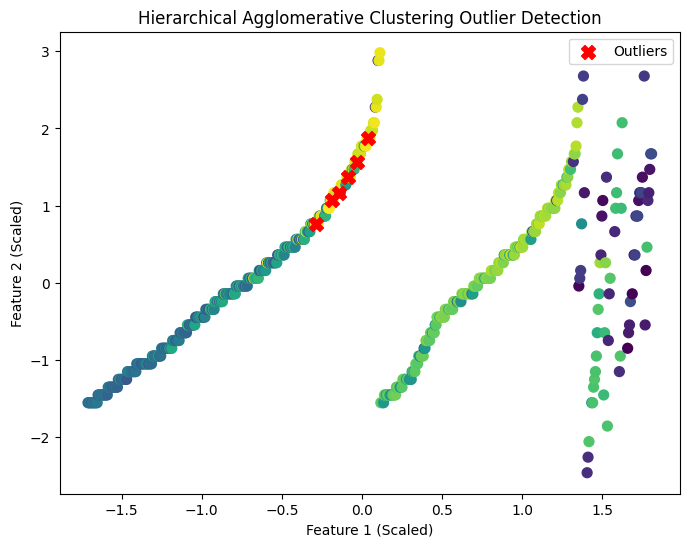

In [15]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

linked = linkage(scaled_data, method='ward')

# dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

threshold = 3
clusters = fcluster(linked, threshold, criterion='distance')

# Adding the cluster labels to the original data
data_clean['Cluster'] = clusters

# Outliers
outlier_indices = data_clean[data_clean['Cluster'] == max(clusters)]['Cluster'].index
outliers = data_clean.iloc[outlier_indices]
print(f"\nOutliers Detected:\n{outliers}")

# Visualizing the clusters and outliers
plt.figure(figsize=(8, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters, cmap='viridis', s=50)
plt.scatter(scaled_data[outlier_indices, 0], scaled_data[outlier_indices, 1], color='red', label="Outliers", s=100, marker='X')
plt.title("Hierarchical Agglomerative Clustering Outlier Detection")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.legend()
plt.show()